### Plot _thornado_ data

Notebook for quick plotting of 1D _thornado_ data for the limter parameter study. 

---

Action Items:
0. ~~Redo data structure: consider Python dictionary, `data['run']['field']`~~

1. ~~Compute and Plot Cell Averages~~
    
2. ~~Finish Runs~~ 

3. ~~Create Error Function~~

4. ~~Create Total Varaition Calculation~~

5. ~~Create Tables~~
   
6. ~~Add Componentwise to the plots below~~ 

7. ~~Shock Detector~~

8. ~~Plot Winner (2.0, 0.2) and reference like below.~~

9. Run with Other EOS's

10. Create another plotting file, plot: resolution comparison and EOS comparison.

---
To Do (Functional):  

* Make it easier to select what to plot. Currently: Very Manual 
* Want easier use for data from multiple runs
* Combine reading of data and creating data structures into one loop
---

In [1]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib ipympl

Some global plotting options

In [2]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['ytick.labelsize']   = 14

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [3]:
sims = ["100_B1.0_C0.0_3", "100_B1.0_C1.5E-2_3", "100_B1.0_C5E-2_3", "100_B1.0_C1.0E-1_3",
        "100_B1.5_C0.0_3", "100_B1.5_C1.5E-2_3", "100_B1.5_C5E-2_3","100_B1.5_C1.0E-1_3",
        "100_B1.75_C0.0_3", "100_B1.75_C1.5E-2_3", "100_B1.75_C5E-2_3","100_B1.75_C1.0E-1_3",
        "100_B2.0_C0.0_3", "100_B2.0_C1.5E-2_3", "100_B2.0_C5E-2_3", "100_B2.0_C1.0E-1_3"] #The desired run

fields = [ 'uAF_P', 'uAF_Ye', 'uPF_V1', 'uCF_D', 'uCF_Ne' ]
dataDirs = []#np.zeros( len(sims) )
for i in range( len( sims) ):
    dataDirs.append("../../data/Sod/nuclear/paramStudy" + "/" + sims[i])
dataDir_ref = "../../data/Sod/nuclear/reference"
dataDir_cw = "../../data/Sod/nuclear/cw_100_B1.75_C5.0E-2_3"

Setup figure directory

In [4]:
figDir = "../figures/"

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [5]:
fileNumber = "000102"
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileNames = []#np.zeros(len(sims))
for i in range( len( sims) ):
    fileNames.append(dataDirs[i] + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' )
fileName_ref = dataDir_ref + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 
fileName_cw = dataDir_cw + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 

mb = 1.660539 * pow(10,-24)

Shock Detector

In [6]:
fileNumberF = 102 #final
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileNames_sh = []
#for i in range( len( sims) ): #For now, just use the 'winner'
for i in range(10):
    fileNames_sh.append(dataDirs[15] + '/' + 'RiemannProblem' + '_FluidFields_00000' + str(i) + '.h5' )
for i in range(10,100):
    fileNames_sh.append(dataDirs[15] + '/' + 'RiemannProblem' + '_FluidFields_0000' + str(i) + '.h5' )
    
for i in range(100,fileNumberF+1):
    fileNames_sh.append(dataDirs[15] + '/' + 'RiemannProblem' + '_FluidFields_000' + str(i) + '.h5' )
    

Read the Data and load into a python dict

In [7]:
data = {} # Point Values
for i in range( len( sims ) ):
    
    with h5py.File(fileNames[i], 'r') as f:
        
#         for key in f.keys():
#             print(key)

        time = f['Time'][:]

        x1 = f['/Spatial Grid/X1'][:]

        uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
        uAF_Ye = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]

        uPF_V1 = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]

        uCF_D = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
        uCF_Ne = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
        
        shock = f['/Shock Detector/Shock'][0][0][:]
        

       # print("Time:", float(time), "ms")

        data[sims[i]] = {}
        data[sims[i]]['x1'] = x1[:]
        data[sims[i]][fields[0]] = uAF_P[0][0][:]
        data[sims[i]][fields[1]] = mb * uCF_Ne[0][0][:] / uCF_D[0][0][:]#uAF_Ye[0][0][:]
        data[sims[i]][fields[2]] = uPF_V1[0][0][:]
        data[sims[i]][fields[3]] = uCF_D[0][0][:]
        data[sims[i]][fields[4]] = uCF_Ne[0][0][:]
        data[sims[i]]['shock'] = shock
#         for j in range(len(fields)):
#             data2[sims[i]][fields[j]] = 
    
## Reference Run    
with h5py.File(fileName_ref, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_ref = f['/Spatial Grid/X1'][:]
    
    uAF_P_ref  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_ref = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]

    uPF_V1_ref = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_ref = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_ref = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")
    
## Componentwise   
with h5py.File(fileName_cw, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_cw = f['/Spatial Grid/X1'][:]
    
    uAF_P_cw  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_cw = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]

    uPF_V1_cw = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_cw = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_cw = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")    
    
    data_cw = {}
    data_cw['x1'] = x1[:]
    data_cw[fields[0]] = uAF_P_cw[0][0][:]
    data_cw[fields[1]] = mb * uCF_Ne_cw[0][0][:] / uCF_D_cw[0][0][:]#uAF_Ye[0][0][:]
    data_cw[fields[2]] = uPF_V1_cw[0][0][:]
    data_cw[fields[3]] = uCF_D_cw[0][0][:]
    data_cw[fields[4]] = uCF_Ne_cw[0][0][:]
    #data[sims[i]]['shock'] = shock
          
      #data = np.zeros((fileNumberF-2,100)) # Point Values
data_shock = np.zeros((fileNumberF+1,100)) # Point Values
time = {}
# for i in range( 2,len( fileNames ) ):
for i in range(len( fileNames_sh ) ):
    
    with h5py.File(fileNames_sh[i], 'r') as f:
        
#         for key in f.keys():
#             print(key)

        time_in = f['Time'][:]
        time[i] = time_in[0]

        x1 = f['/Spatial Grid/X1'][:]
        
        shock = f['/Shock Detector/Shock'][:]
        

       # print("Time:", float(time), "ms")
        x1 = x1[:]
        data_shock[i] = shock[:]

      

Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.025 ms
Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.025 ms


Reference run

In [8]:
data_ref = {}
data_ref['x1'] = x1_ref
data_ref['uCF_D'] = uCF_D_ref[0][0][:]
data_ref['uAF_Ye'] = mb * uCF_Ne_ref[0][0][:] / uCF_D_ref[0][0][:] #uAF_Ye_ref[0][0][:]
data_ref['uCF_Ne'] = uCF_Ne_ref[0][0][:]
data_ref['uAF_P'] = uAF_P_ref[0][0][:]
data_ref['uPF_V1'] = uPF_V1_ref[0][0][:]

Compute Cell Averages

Do this by summing over the pts in a cell (nNodes points per cell)

In [9]:
nNodes = 3
wG = [ 5.0/(1*18.0), 8.0/(1*18.0), 5.0/(1*18.0) ]
N_N = len(x1)

N_K = N_N / nNodes

#Make this nicer by creating a summation over len(fields)
data_avg = {}
for i in range( len( sims ) ):
    data_avg[sims[i]] = {}
    data_avg[sims[i]]['x1'] = np.zeros(int(N_K)) #Create arrays of length N_K
    data_avg[sims[i]][fields[0]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[1]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[2]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[3]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[4]] = np.zeros(int(N_K))
    for j in range(int(N_K)):
        data_avg[sims[i]]['x1'][j] = (np.sum( wG * data[sims[i]]['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_avg[sims[i]][fields[0]][j] = np.sum( wG * data[sims[i]][fields[0]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[1]][j] = np.sum( wG * data[sims[i]][fields[1]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[2]][j] = np.sum( wG * data[sims[i]][fields[2]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[3]][j] = np.sum( wG * data[sims[i]][fields[3]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[4]][j] = np.sum( wG * data[sims[i]][fields[4]][(j)*nNodes:(j+1)*nNodes] )
        
data_cw_avg = {}    
data_cw_avg['x1'] = np.zeros(int(N_K))
for i in range(len(fields)):
    data_cw_avg[fields[i]] = np.zeros(int(N_K))
for i in range( len(fields)):        
    for j in range(int(N_K)):
        data_cw_avg['x1'][j] = (np.sum( wG * data_cw['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_cw_avg[fields[i]][j] = np.sum( wG * data_cw[fields[i]][(j)*nNodes:(j+1)*nNodes] )       

Error Functions

In [10]:
#1. Interpolate data_ref onto data
x = np.linspace(-5,5,len(data_ref['x1']))
data_interp = {}

error = {}
for i in range( len( sims ) ):
    data_interp[sims[i]] = {}
    error[sims[i]] = {}
    data_interp[sims[i]]['x1'] = np.interp(data[sims[i]]['x1'],x,data_ref['x1'])
    for j in range(len(fields)):
        data_interp[sims[i]][fields[j]] = np.interp(data[sims[i]]['x1'],x,data_ref[fields[j]])
        error[sims[i]][fields[j]] = (1/300.0) * sum(abs((data_interp[sims[i]][fields[j]] - data[sims[i]][fields[j]]) ) / data_interp[sims[i]][fields[j]] )


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


Compute Total Variation

In [11]:
# TV = sum( ub_k+1 - ub_k)
tv = {}
for i in range( len( sims ) ):
    tv[sims[i]] = {}
    for j in range(len(fields)):
        tv[sims[i]][fields[j]] = 0#np.zeros(int(N_K))
        for k in range(int(N_K)-1):
            tv[sims[i]][fields[j]] += abs((data_avg[sims[i]][fields[j]][k+1] - data_avg[sims[i]][fields[j]][k]) ) 
            

Create nicer to use matrices. Ugly.

In [12]:
tvMat_d   = np.zeros((4, 4))
errMat_ye = np.zeros((4, 4))
errMat_d  = np.zeros((4, 4))
tvMat_ye  = np.zeros((4, 4))

tvMat_d[0,0] = tv[sims[12]]['uCF_D']
tvMat_d[0,1] = tv[sims[13]]['uCF_D']
tvMat_d[0,2] = tv[sims[14]]['uCF_D']
tvMat_d[0,3] = tv[sims[15]]['uCF_D']
tvMat_d[1,0] = tv[sims[8]]['uCF_D']
tvMat_d[1,1] = tv[sims[9]]['uCF_D']
tvMat_d[1,2] = tv[sims[10]]['uCF_D']
tvMat_d[1,3] = tv[sims[11]]['uCF_D']
tvMat_d[2,0] = tv[sims[4]]['uCF_D']
tvMat_d[2,1] = tv[sims[5]]['uCF_D']
tvMat_d[2,2] = tv[sims[6]]['uCF_D']
tvMat_d[2,3] = tv[sims[7]]['uCF_D']
tvMat_d[3,0] = tv[sims[0]]['uCF_D']
tvMat_d[3,1] = tv[sims[1]]['uCF_D']
tvMat_d[3,2] = tv[sims[2]]['uCF_D']
tvMat_d[3,3] = tv[sims[3]]['uCF_D']

tvMat_ye[0,0] = tv[sims[12]]['uAF_Ye']
tvMat_ye[0,1] = tv[sims[13]]['uAF_Ye']
tvMat_ye[0,2] = tv[sims[14]]['uAF_Ye']
tvMat_ye[0,3] = tv[sims[15]]['uAF_Ye']
tvMat_ye[1,0] = tv[sims[8]]['uAF_Ye']
tvMat_ye[1,1] = tv[sims[9]]['uAF_Ye']
tvMat_ye[1,2] = tv[sims[10]]['uAF_Ye']
tvMat_ye[1,3] = tv[sims[11]]['uAF_Ye']
tvMat_ye[2,0] = tv[sims[4]]['uAF_Ye']
tvMat_ye[2,1] = tv[sims[5]]['uAF_Ye']
tvMat_ye[2,2] = tv[sims[6]]['uAF_Ye']
tvMat_ye[2,3] = tv[sims[7]]['uAF_Ye']
tvMat_ye[3,0] = tv[sims[0]]['uAF_Ye']
tvMat_ye[3,1] = tv[sims[1]]['uAF_Ye']
tvMat_ye[3,2] = tv[sims[2]]['uAF_Ye']
tvMat_ye[3,3] = tv[sims[3]]['uAF_Ye']

errMat_ye[0,0] = error[sims[12]]['uAF_Ye']
errMat_ye[0,1] = error[sims[13]]['uAF_Ye']
errMat_ye[0,2] = error[sims[14]]['uAF_Ye']
errMat_ye[0,3] = error[sims[15]]['uAF_Ye']
errMat_ye[1,0] = error[sims[8]]['uAF_Ye']
errMat_ye[1,1] = error[sims[9]]['uAF_Ye']
errMat_ye[1,2] = error[sims[10]]['uAF_Ye']
errMat_ye[1,3] = error[sims[11]]['uAF_Ye']
errMat_ye[2,0] = error[sims[4]]['uAF_Ye']
errMat_ye[2,1] = error[sims[5]]['uAF_Ye']
errMat_ye[2,2] = error[sims[6]]['uAF_Ye']
errMat_ye[2,3] = error[sims[7]]['uAF_Ye']
errMat_ye[3,0] = error[sims[0]]['uAF_Ye']
errMat_ye[3,1] = error[sims[1]]['uAF_Ye']
errMat_ye[3,2] = error[sims[2]]['uAF_Ye']
errMat_ye[3,3] = error[sims[3]]['uAF_Ye']

errMat_d[0,0] = error[sims[12]]['uCF_D']
errMat_d[0,1] = error[sims[13]]['uCF_D']
errMat_d[0,2] = error[sims[14]]['uCF_D']
errMat_d[0,3] = error[sims[15]]['uCF_D']
errMat_d[1,0] = error[sims[8]]['uCF_D']
errMat_d[1,1] = error[sims[9]]['uCF_D']
errMat_d[1,2] = error[sims[10]]['uCF_D']
errMat_d[1,3] = error[sims[11]]['uCF_D']
errMat_d[2,0] = error[sims[4]]['uCF_D']
errMat_d[2,1] = error[sims[5]]['uCF_D']
errMat_d[2,2] = error[sims[6]]['uCF_D']
errMat_d[2,3] = error[sims[7]]['uCF_D']
errMat_d[3,0] = error[sims[0]]['uCF_D']
errMat_d[3,1] = error[sims[1]]['uCF_D']
errMat_d[3,2] = error[sims[2]]['uCF_D']
errMat_d[3,3] = error[sims[3]]['uCF_D']

dat = {}
for i in range(2) :
    dat[i] = {}
dat[0][0] = tvMat_d
dat[0][1] = tvMat_ye
dat[1][0] = errMat_d
dat[1][1] = errMat_ye



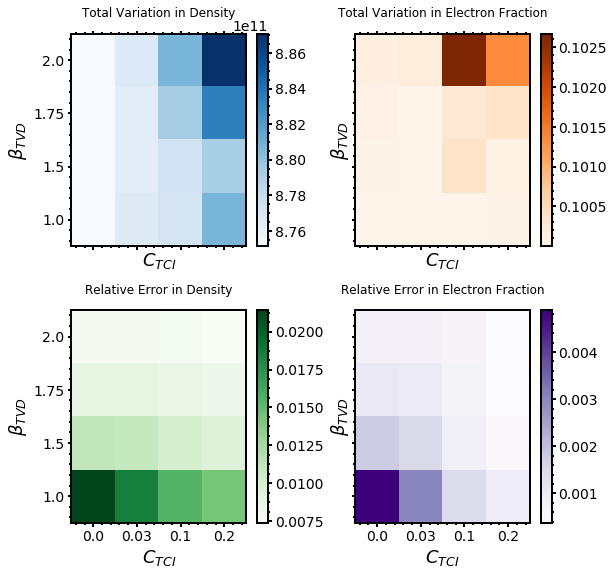

In [39]:
fig, cax = plt.subplots(2,2, sharex=True,sharey=True,figsize=(9,9))
fig.subplots_adjust(hspace=.3, wspace=0.3)
# ---

cmap = [["Blues", "Oranges"], ["Greens", "Purples"]]
titles = [["Total Variation in Density", "Total Variation in Electron Fraction"], 
          ["Relative Error in Density", "Relative Error in Electron Fraction"]]
Bvals = [2.0, 1.75, 1.5, 1.0]
Cvals = [0.0, 0.03, 0.1, 0.2]

for i in range(2) :
    for j in range(2) :
        im = cax[i,j].matshow(dat[i][j], cmap=cmap[i][j])
        plt.colorbar(im,ax=cax[i,j])
        cax[i,j].set_aspect('auto')
        cax[i,j].set(xlabel=r'$C_{TCI}$', ylabel=r"$\beta_{TVD}$")
        cax[i,j].set_title(titles[i][j])
ax = plt.gca()     
yticks = ax.set_yticks((range(4)))
ax.set_yticklabels(Bvals)
xticks = ax.set_xticks((range(len(Cvals))))
ax.set_xticklabels(Cvals) 
cax[1,1].xaxis.tick_bottom()
cax[1,0].xaxis.tick_bottom()


plt.savefig('../figures/error_tv_landscape.png', dpi=200, bbox_inches='tight')

Plot! CW, Characteristic, Reference. Compare to 'Analytic' Diagonals, Red is Winner (2.0, 0.2)

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0xb1b67f5f8>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0xb1b67fd68>)

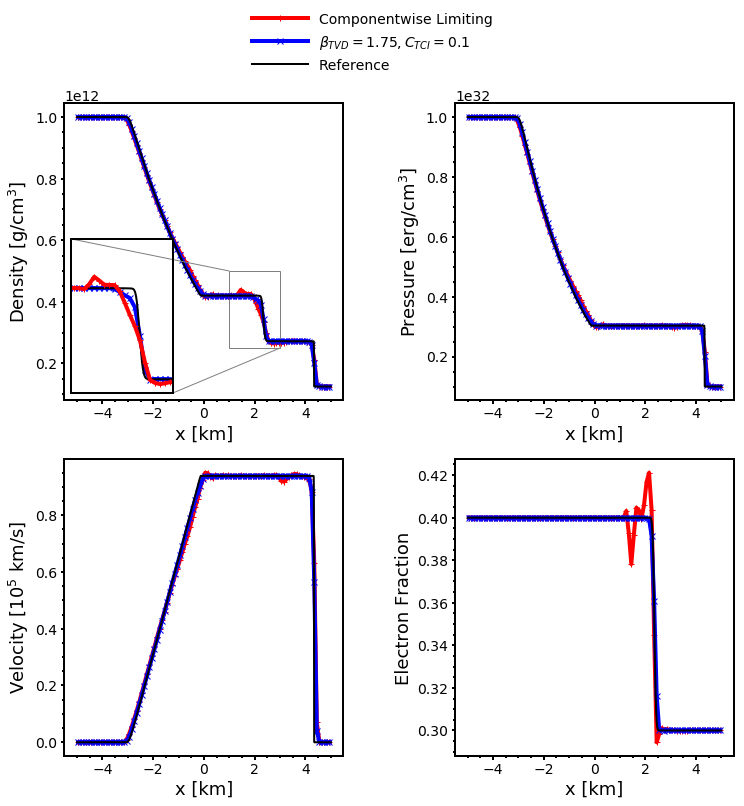

In [11]:
fig, cax = plt.subplots(2,2, sharex=False,figsize=(12,12))
fig.subplots_adjust(hspace=.2, wspace=0.4)
# ---
cax[0,0].plot(data_cw_avg['x1'], data_cw_avg['uCF_D'], label="Componentwise Limiting",marker="+",color="red")
cax[0,0].plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uCF_D'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
cax[0,0].plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[0,0].set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')
#cax[0,0].set_title("Sod Shock Tube (t = 0.025ms)")
# ---

cax[0,1].plot(data_cw_avg['x1'], data_cw_avg['uAF_P'], label="Componentwise Limiting",marker="+",color="red")
cax[0,1].plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uAF_P'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
cax[0,1].plot(x1_ref,data_ref['uAF_P'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[0,1].set(xlabel="x [km]",ylabel = r'Pressure [erg/cm$^3$]')
# --- 
# generate 2 2d grids for the x & y bounds

cax[1,0].plot(data_cw_avg['x1'], data_cw_avg['uPF_V1']/(10**5), label="Componentwise Limiting",marker="+",color="red")
cax[1,0].plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uPF_V1']/(10**5),marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
cax[1,0].plot(x1_ref,data_ref['uPF_V1']/(10**5), linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[1,0].set(xlabel="x [km]",ylabel = r'Velocity [$10^{5}$ km/s]')
# ---
cax[1,1].plot(data_cw_avg['x1'], data_cw_avg['uAF_Ye'], label="Componentwise Limiting",marker="+",color="red")
cax[1,1].plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uAF_Ye'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
cax[1,1].plot(x1_ref,data_ref['uAF_Ye'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[1,1].set(xlabel="x [km]",ylabel = r'Electron Fraction')
#cax[1,1].yaxis.tick_right()
#cax[1,1].yaxis.set_label_position("right")


handles, labels = cax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(cax[0,0], 2.0, loc=3) # zoom-factor: 2.5, location: upper-left
axins.plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uCF_D'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
axins.plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
axins.plot(data_cw_avg['x1'], data_cw_avg['uCF_D'], label="Componentwise Limiting",marker="+",color="red")
x1, x2, y1, y2 = 1.0, 3, 0.25*10**12, 0.5*10**12 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(cax[0,0], axins, loc1=2, loc2=4, fc="none", ec="0.5")
#plt.savefig('../figures/characteristic_cw.png', dpi=200, bbox_inches='tight')

Optimal Parameters, No CW

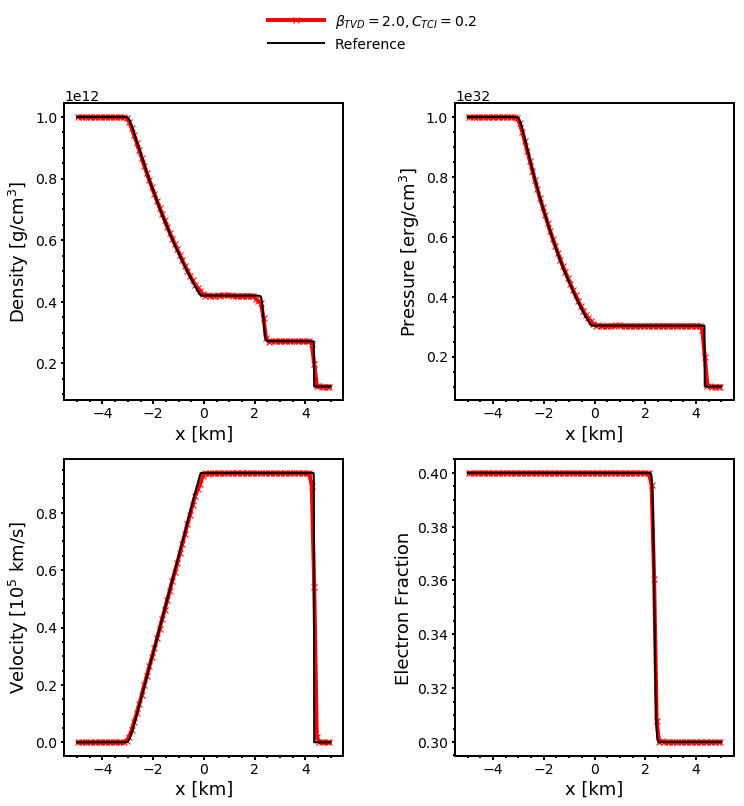

In [15]:
fig, cax = plt.subplots(2,2, sharex=False,figsize=(12,12))
fig.subplots_adjust(hspace=.2, wspace=0.4)
# ---
cax[0,0].plot(data_avg[sims[-1]]['x1'],data_avg[sims[-1]]['uCF_D'],marker='x',color='red',label=r"$\beta_{TVD} = 2.0, C_{TCI}=0.2$")
cax[0,0].plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[0,0].set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')
#cax[0,0].set_title("Sod Shock Tube (t = 0.025ms)")
# ---

cax[0,1].plot(data_avg[sims[-1]]['x1'],data_avg[sims[-1]]['uAF_P'],marker='x',color='red',label=r"$\beta_{TVD} = 2.0, C_{TCI}=0.2$")
cax[0,1].plot(x1_ref,data_ref['uAF_P'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
#cax[1,1].legend()
cax[0,1].set(xlabel="x [km]",ylabel = r'Pressure [erg/cm$^3$]')
#cax[1,1].yaxis.tick_right()
#cax[1,1].yaxis.set_label_position("right")
#cax[0,1].yaxis.tick_right()
#cax[0,1].yaxis.set_label_position("right")
# --- 
# generate 2 2d grids for the x & y bounds
cax[1,0].plot(data_avg[sims[-1]]['x1'],data_avg[sims[-1]]['uPF_V1']/(10**5),marker='x',color='red',label=r"$\beta_{TVD} = 2.0, C_{TCI}=0.2$")
cax[1,0].plot(x1_ref,data_ref['uPF_V1']/(10**5), linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax[1,0].set(xlabel="x [km]",ylabel = r'Velocity [$10^5$ km/s]')
# ---
cax[1,1].plot(data_avg[sims[-1]]['x1'],data_avg[sims[-1]]['uAF_Ye'],marker='x',color='red',label=r"$\beta_{TVD} = 2.0, C_{TCI}=0.2$")
cax[1,1].plot(x1_ref,data_ref['uAF_Ye'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
#cax[0,1].legend()
cax[1,1].set(xlabel="x [km]",ylabel = r'Electron Fraction')



handles, labels = cax[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.savefig('../figures/optimal.png', dpi=200, bbox_inches='tight')

Plot! Density

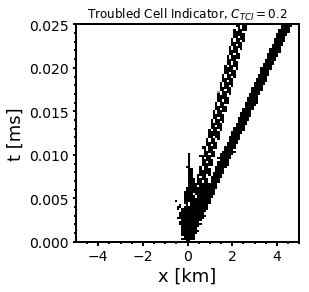

In [40]:
fig, cax = plt.subplots(1, figsize=(4,4))
# --- 
# generate 2 2d grids for the x & y bounds
xp = np.linspace(-5,5,100)
tp = np.linspace(0,0.025,103)
x, y = np.meshgrid(xp, tp)
cax.pcolormesh(x, y, data_shock,cmap="Greys", vmin = 0.03, vmax = 0.0301)
cax.set_title(r'Troubled Cell Indicator, $C_{TCI}=0.2$')
cax.set(xlabel="x [km]",ylabel = r't [ms]')
cax.axis([x.min(), x.max(), y.min(), y.max()])

plt.savefig('../figures/optimal_shock.png', dpi=200, bbox_inches='tight')

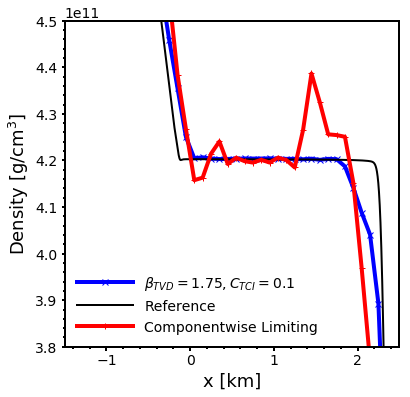

In [51]:
fig, cax = plt.subplots(1, figsize=(6,6))
fig.subplots_adjust(hspace=.4, wspace=0.4)
# --- 
cax.plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uCF_D'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
cax.plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax.plot(data_cw_avg['x1'], data_cw_avg['uCF_D'], label="Componentwise Limiting",marker="+",color="red")
cax.set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')
cax.set_xlim([-1.5,2.5])
cax.set_ylim([0.38*10**12,0.45*10**12])

# handles, labels = cax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
cax.legend()


plt.savefig('../figures/characteristic_cw_densZoom.png', dpi=200, bbox_inches='tight')

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0xb1be5d860>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0xb1be5df98>)

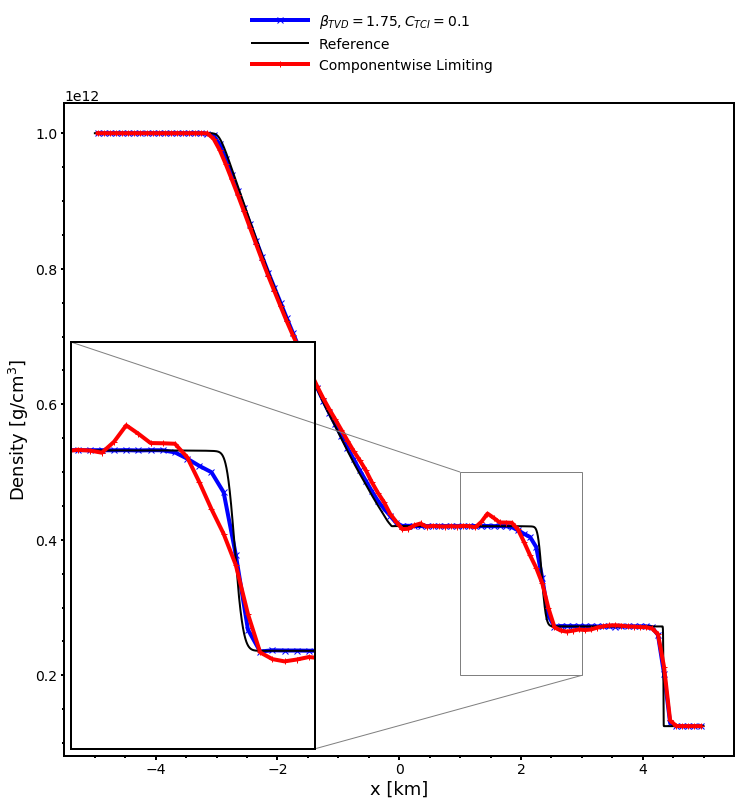

In [20]:
fig, cax = plt.subplots(1, figsize=(12,12))
# --- 
cax.plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uCF_D'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
cax.plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
cax.plot(data_cw_avg['x1'], data_cw_avg['uCF_D'], label="Componentwise Limiting",marker="+",color="red")
cax.set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')
# cax.set_xlim([-1.5,2.5])
# cax.set_ylim([0.38*10**12,0.45*10**12])

handles, labels = cax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(cax, 2.0, loc=3) # zoom-factor: 2.5, location: upper-left
axins.plot(data_avg[sims[10]]['x1'],data_avg[sims[10]]['uCF_D'],marker='x',color='blue',label=r"$\beta_{TVD} = 1.75, C_{TCI}=0.1$")
axins.plot(x1_ref,data_ref['uCF_D'], linestyle='-',linewidth='2.0', label="Reference", color = "black")
axins.plot(data_cw_avg['x1'], data_cw_avg['uCF_D'], label="Componentwise Limiting",marker="+",color="red")
x1, x2, y1, y2 = 1.0, 3, 0.2*10**12, 0.5*10**12 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(cax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
#$\beta_{TVD} = 2.0, C_{TCI}=0.2$